In [1]:
from PIL import Image, ImageDraw, ImageFilter
from math import sqrt
import random
import numpy as np

In [2]:
# AGH logo patch

In [3]:
logo_path = './AGH.png'

In [4]:
test_image_path = './dataset/Test/00002.png'

In [5]:
#
#    layout is (float, float), which shows in which part of dimension should image start
#

def load_full_logo(prev_image: Image, area: float, opacity: float, layout: (float, float), rotation: int):
    size = prev_image.size
    prev_image = prev_image.convert("RGBA")
    logo = load_logo(size)
    logo = change_layout(logo, area, rotation)
    fin_layout = [int(size_d * layout_d) for size_d, layout_d in zip(size, layout)]

    # create pasting mask
    mask_im = Image.new("L", size, 0)
    fn = lambda x : int(opacity * 255) if x > 0 else 0
    logo_mask = logo.convert("L").point(fn, mode='L')
    mask_im.paste(logo_mask, box=fin_layout)
    
    # create image to paste with mask
    to_paste = Image.new("RGBA", size, 0)
    to_paste.paste(logo, box=fin_layout)

    prev_image.paste(to_paste, mask=mask_im)
    
    prev_image.save('new_img.png', save_all=True)
    display(prev_image)

In [6]:
def load_logo(size: [int, int]):
    return Image.open(logo_path).resize(size).convert("RGBA")

In [7]:
def change_layout(image, area = 1.0, rotation = 0):
    size = [int(dim * sqrt(area)) for dim in image.size]
    image = image.resize(size).rotate(rotation)
    
    return image

In [8]:
image = Image.open(test_image_path)

In [9]:
image.size

(48, 52)

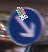

In [10]:
load_full_logo(image, 0.1, 1, [0.3,0.1], 30)

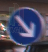

In [11]:
load_full_logo(image, 0.5, 0.1, [0,0], 0)

# Chess like pattern

In [12]:
def load_chess_pattern(prev_image: Image, opacity: float, layout: (float, float)):
    size = prev_image.size
    prev_image = prev_image.convert("RGBA")
    
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    for x in range(int(layout[0] * size[0]), size[0], 2):
        for y in range(int(layout[1] * size[1]), size[1], 2):
            draw.point((x, y), fill=255)
            
    prev_image1 = prev_image.copy()
    prev_image1.putalpha(int(opacity * 255))
    prev_image.paste(prev_image1, mask=mask)
    display(mask)
    
    prev_image.save('new_img.png', save_all=True)
    display(prev_image)

In [13]:
image = Image.open(test_image_path)

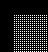

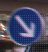

In [14]:
load_chess_pattern(image, 0.9, (0.3,0.3))

# Random pixels pattern 

In [15]:
def get_random_pixels(pixels_no: int, size: (int, int)):
    pixels = []
    for i in range(pixels_no):
        x = int(random.random() * size[0])
        y = int(random.random() * size[1])
        pixels.append((x, y))
    return pixels

In [16]:
def load_random_pattern(prev_image: Image, pixels: int, opacity: float):
    size = prev_image.size
    prev_image = prev_image.convert("RGBA")
    
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    pixels = get_random_pixels(pixels, size)
    for x, y in pixels:
        draw.point((x, y), fill=255)
            
    prev_image1 = prev_image.copy()
    prev_image1.putalpha(int(opacity * 255))
    prev_image.paste(prev_image1, mask=mask)
    display(mask)
    
    prev_image.save('new_img.png', save_all=True)
    display(prev_image)

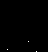

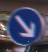

In [17]:
image = Image.open(test_image_path)
load_random_pattern(image, 3, 0.5)

# Gradient

In [22]:
def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

In [23]:
def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=float)
    

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result

In [24]:
def get_gradient_mask(size, start_color, end_color, horizontal=True):
    array = get_gradient_3d(size[0], size[1], (start_color,) * 3, (end_color,) * 3, (horizontal,) * 3)
    im = Image.fromarray(np.uint8(array))
    return im.convert("L")

In [25]:
def load_gradient(prev_image: Image, start_color, end_color, horizontal=True):
    size = prev_image.size
    prev_image = prev_image.convert("RGBA")
    
    mask = get_gradient_mask(size, start_color, end_color, horizontal)
    display(mask)
            
    prev_image1 = prev_image.copy()
    prev_image1.putalpha(0)
    display(prev_image)
    display(prev_image1)
    prev_image.paste(prev_image1, mask=mask)
    
    
    prev_image.save('new_img.png', save_all=True)
    display(prev_image)

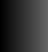

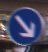

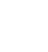

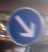

In [26]:
image = Image.open(test_image_path)
load_gradient(image, 0, 100)